In [2]:
import numpy
import pandas
import sklearn
import scipy
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

In [47]:
def distance(a, b):
    a = np.array(a)
    b = np.array(b)
    dist = np.linalg.norm(a-b)
    return dist

def e_neighbor(data, epsilon, p):

    N = []
    r, c = data.shape
    for i in range(r):
        if i != p and distance(data[i], data[p]) <= epsilon:
            N.append(i)
    return N


def DBSCAN(data, epsilon, minpoints):

    Cluster_number = 0 
    rows, cols = data.shape
    labels = numpy.array([-1] * rows)

    for p in range(rows):
        if labels[p] == -1:
            N = e_neighbor(data, epsilon, p)
            if len(N) < minpoints - 1: 
                #noisy data
                labels[p] = 0 
            else:
                Cluster_number = Cluster_number + 1
                labels[p] = Cluster_number
                for q in N:
                    if labels[q] > 0:
                        continue
                    labels[q] = Cluster_number
                    M = e_neighbor(data, epsilon, q)
                    if len(M) >= minpoints:
                        N += M
    return labels

In [76]:
data = np.loadtxt(r'D:\\AUT_ML\\ML_HW04\\ML_HW04\\data\\3\Compound.txt')

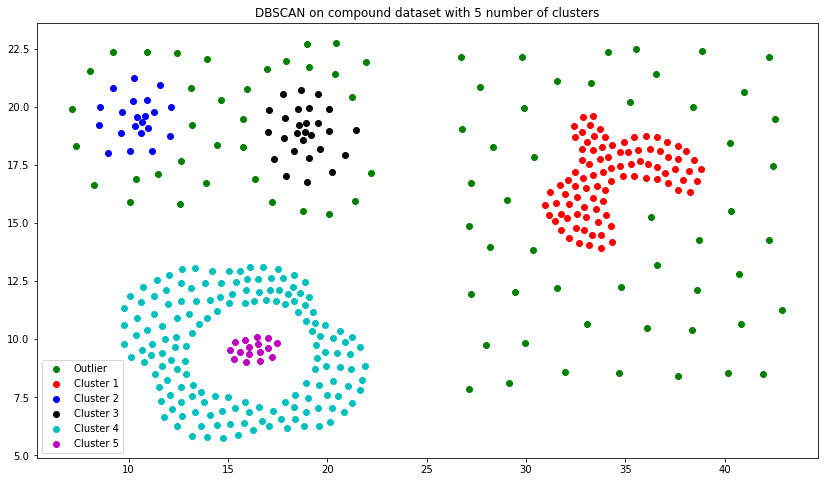

In [77]:
labels = DBSCAN(data, 1.6,12)

plt.figure(figsize=(14,8))
c = ['g','r','b','k','c','m']

for l in numpy.unique(labels):
    index = labels == l
    label = 'Cluster {0}'.format(l) if l else 'Outlier'
    plt.scatter(data[:, 0][index], data[:, 1][index], color=c[l], label=label)

plt.legend()
plt.title('DBSCAN on compound dataset with %d number of clusters' % (len(numpy.unique(labels))-1))
plt.show()

In [78]:
data_purity = data.copy()
purity = 0.0
Real_number_of_clusters = 6
for i in range(Real_number_of_clusters):
    temp = np.zeros(len(labels))
    for j in range(len(labels)):
        if int(data_purity[j][-1]) == i+1:
            temp[int(labels[j])] += 1
    purity += (1/len(labels))*np.max(temp)

purity

0.9122807017543859

In [90]:
data = np.loadtxt(r'D:\\AUT_ML\\ML_HW04\\ML_HW04\\data\\3\D31.txt')

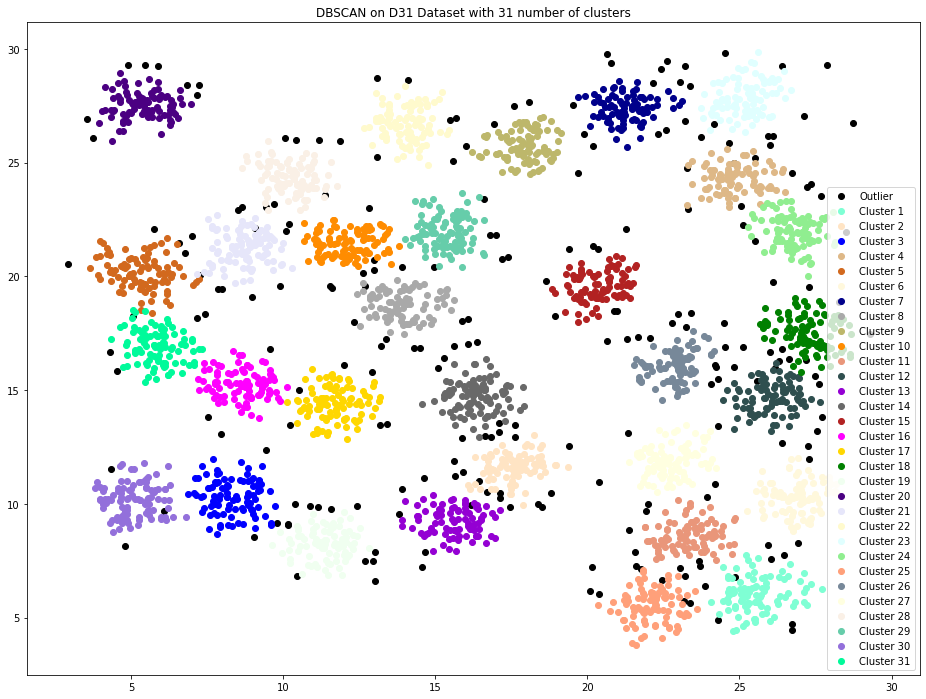

In [91]:
labels = DBSCAN(data, 0.55,5)

colors = list(mcolors.CSS4_COLORS.keys())[:96:3]
#noise color
colors[0]='black'
plt.figure(figsize=(16,12))

for l in numpy.unique(labels):
    index = labels == l
    label = 'Cluster {0}'.format(l) if l else 'Outlier'
    plt.scatter(data[:, 0][index], data[:, 1][index], color=colors[l], label=label)

plt.legend()
plt.title('DBSCAN on D31 Dataset with %d number of clusters' % (len(numpy.unique(labels))-1))
plt.show()

In [81]:
data_purity = data.copy()
purity = 0.0
Real_number_of_clusters = 31
for i in range(Real_number_of_clusters):
    temp = np.zeros(len(labels))
    for j in range(len(labels)):
        if int(data_purity[j][-1]) == i+1:
            temp[int(labels[j])] += 1
    purity += (1/len(labels))*np.max(temp)

purity

0.9245161290322582

In [82]:
data = np.loadtxt(r'D:\\AUT_ML\\ML_HW04\\ML_HW04\\data\\3\pathbased.txt')

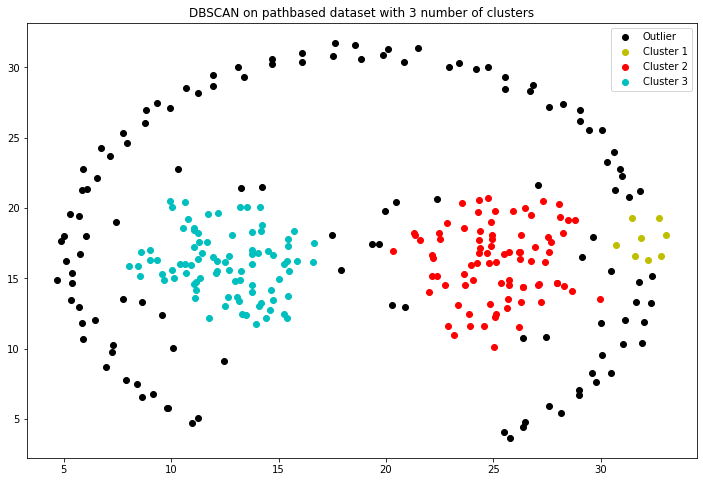

In [83]:
labels = DBSCAN(data, 1.75,8)

c = ['k','y','r','c']
plt.figure(figsize=(12,8))

for l in numpy.unique(labels):
    index = labels == l
    label = 'Cluster {0}'.format(l) if l else 'Outlier'
    plt.scatter(data[:, 0][index], data[:, 1][index], color=c[l], label=label)

plt.legend()
plt.title('DBSCAN on pathbased dataset with %d number of clusters' % (len(numpy.unique(labels))-1))
plt.show()

In [84]:
data_purity = data.copy()
purity = 0.0
Real_number_of_clusters = 3
for i in range(Real_number_of_clusters):
    temp = np.zeros(len(labels))
    for j in range(len(labels)):
        if int(data_purity[j][-1]) == i+1:
            temp[int(labels[j])] += 1
    purity += (1/len(labels))*np.max(temp)

purity

0.9066666666666667

In [85]:
data = np.loadtxt(r'D:\\AUT_ML\\ML_HW04\\ML_HW04\\data\\3\rings.txt')

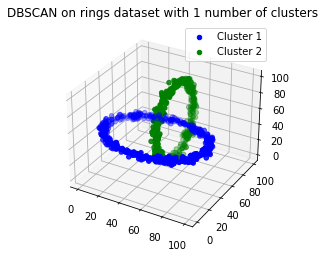

In [86]:
labels = DBSCAN(data, 20,8)
colors = ['b','g']
fig = plt.figure()
# syntax for 3-D plotting
ax = plt.axes(projection ='3d')
for l in numpy.unique(labels):
    index = labels == l
    label = 'Cluster {0}'.format(l) if l else 'Outlier'
    ax.scatter3D(data[:, 1][index], data[:, 2][index], data[:,3][index] ,color=colors[l-1], label=label)

plt.legend()
plt.title('DBSCAN on rings dataset with %d number of clusters' % (len(numpy.unique(labels))-1))
plt.show()

In [87]:
data_purity = data.copy()
purity = 0.0
Real_number_of_clusters = 2
for i in range(Real_number_of_clusters):
    temp = np.zeros(len(labels))
    for j in range(len(labels)):
        if int(data_purity[j][0]) == i+1:
            temp[int(labels[j])] += 1
    purity += (1/len(labels))*np.max(temp)

purity

1.0

In [88]:
data = np.loadtxt(r'D:\\AUT_ML\\ML_HW04\\ML_HW04\\data\\3\spiral.txt')

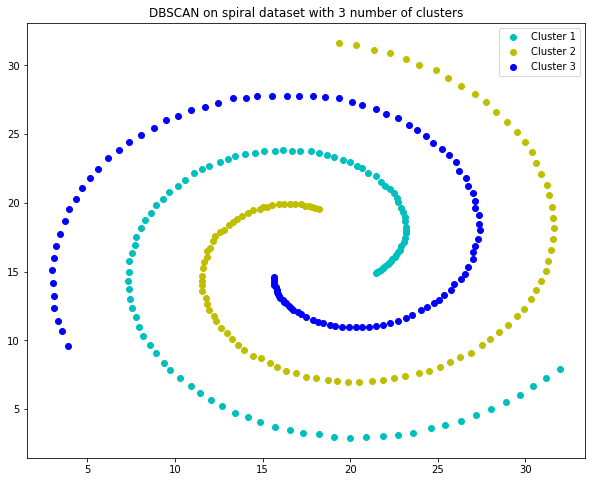

In [89]:
labels = DBSCAN(data, 3,5)

plt.figure(figsize=(10,8))
c = ['c','y','b']

for l in numpy.unique(labels):
    index = labels == l
    label = 'Cluster {0}'.format(l) if l else 'Outlier'
    plt.scatter(data[:, 0][index], data[:, 1][index], color=c[l-1], label=label)

plt.legend()
plt.title('DBSCAN on spiral dataset with %d number of clusters' % (len(numpy.unique(labels))))
plt.show()

In [73]:
data_purity = data.copy()
purity = 0.0
Real_number_of_clusters = 3
for i in range(Real_number_of_clusters):
    temp = np.zeros(len(labels))
    for j in range(len(labels)):
        if int(data_purity[j][-1]) == i+1:
            temp[int(labels[j])] += 1
    purity += (1/len(labels))*np.max(temp)

purity

1.0